# Starting with the import of all libraries 

In [57]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from collections import Counter
import seaborn as sns
from keras.datasets import cifar100

# Loading the dataset, by defining a function, and reshaping and transposing the test, train images

In [2]:
def load_cifar100(data_folder):
    with open(f"{data_folder}/train", 'rb') as f:
        train_data = pickle.load(f, encoding='latin1')
        train_images = np.array(train_data['data']).reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
        train_labels = np.array(train_data['fine_labels'])
        
    with open(f"{data_folder}/test", 'rb') as f:
        test_data = pickle.load(f, encoding='latin1')
        test_images = np.array(test_data['data']).reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
        test_labels = np.array(test_data['fine_labels'])
        
    with open(f"{data_folder}/meta", 'rb') as f:
        meta_data = pickle.load(f, encoding='latin1')
        label_names = meta_data['fine_label_names']
        
    return train_images, train_labels, test_images, test_labels, label_names


# Directory for the dataset

In [3]:
data_folder = "/Users/mario/Desktop/bailey/project/cifar-100-python"
train_images, train_labels, test_images, test_labels, label_names = load_cifar100(data_folder)


# General information about the dataset 

In [4]:
print("Train Images Shape:", train_images.shape)
print("Train Labels Shape:", train_labels.shape)
print("Test Images Shape:", test_images.shape)
print("Test Labels Shape:", test_labels.shape)
print("Label Names:", label_names[:10])  # Just printing the first 10 label names for brevity


Train Images Shape: (50000, 32, 32, 3)
Train Labels Shape: (50000,)
Test Images Shape: (10000, 32, 32, 3)
Test Labels Shape: (10000,)
Label Names: ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle']


# Basic information about our dataset

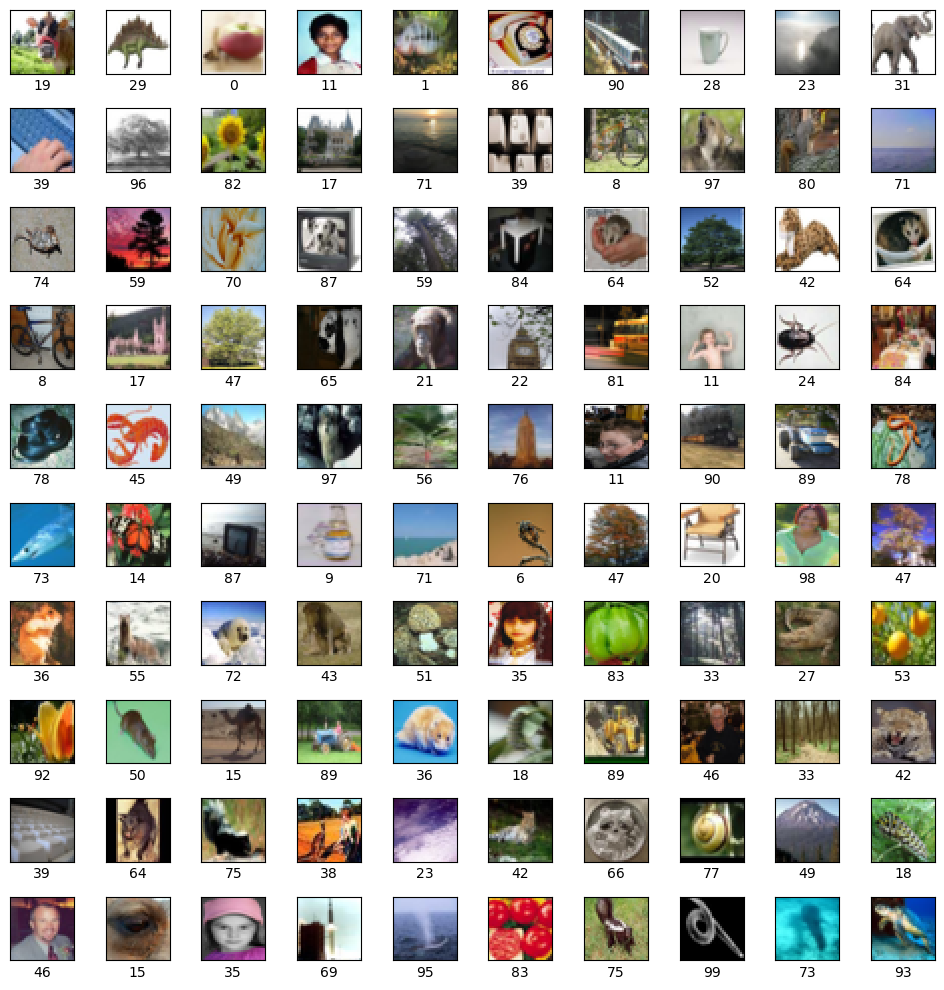

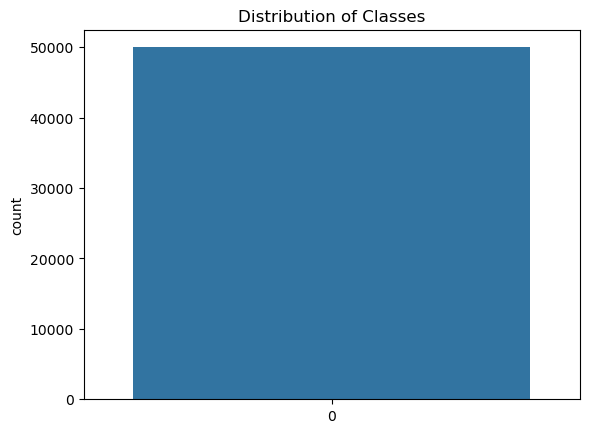

In [60]:
# Displaying few sample images
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(train_labels[i])
    plt.tight_layout()
plt.show()

# Check the distribution of labels
sns.countplot(train_labels.flatten())
plt.title('Distribution of Classes')
plt.show()


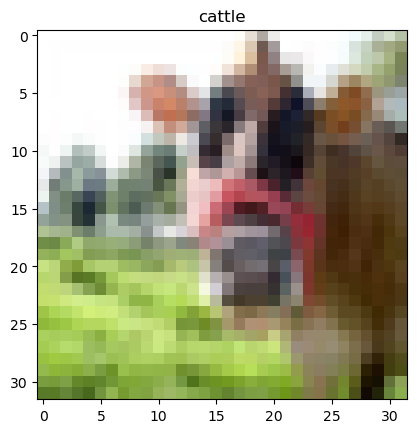

In [10]:
# Display the first image from training set
plt.imshow(train_images[0])
plt.title(label_names[train_labels[0]])
plt.show()

# EDA

In [11]:
print("Number of training examples:", train_images.shape[0])
print("Number of testing examples:", test_images.shape[0])
print("Size of each image:", train_images.shape[1:4])
print("Number of classes:", len(np.unique(train_labels)))


Number of training examples: 50000
Number of testing examples: 10000
Size of each image: (32, 32, 3)
Number of classes: 100


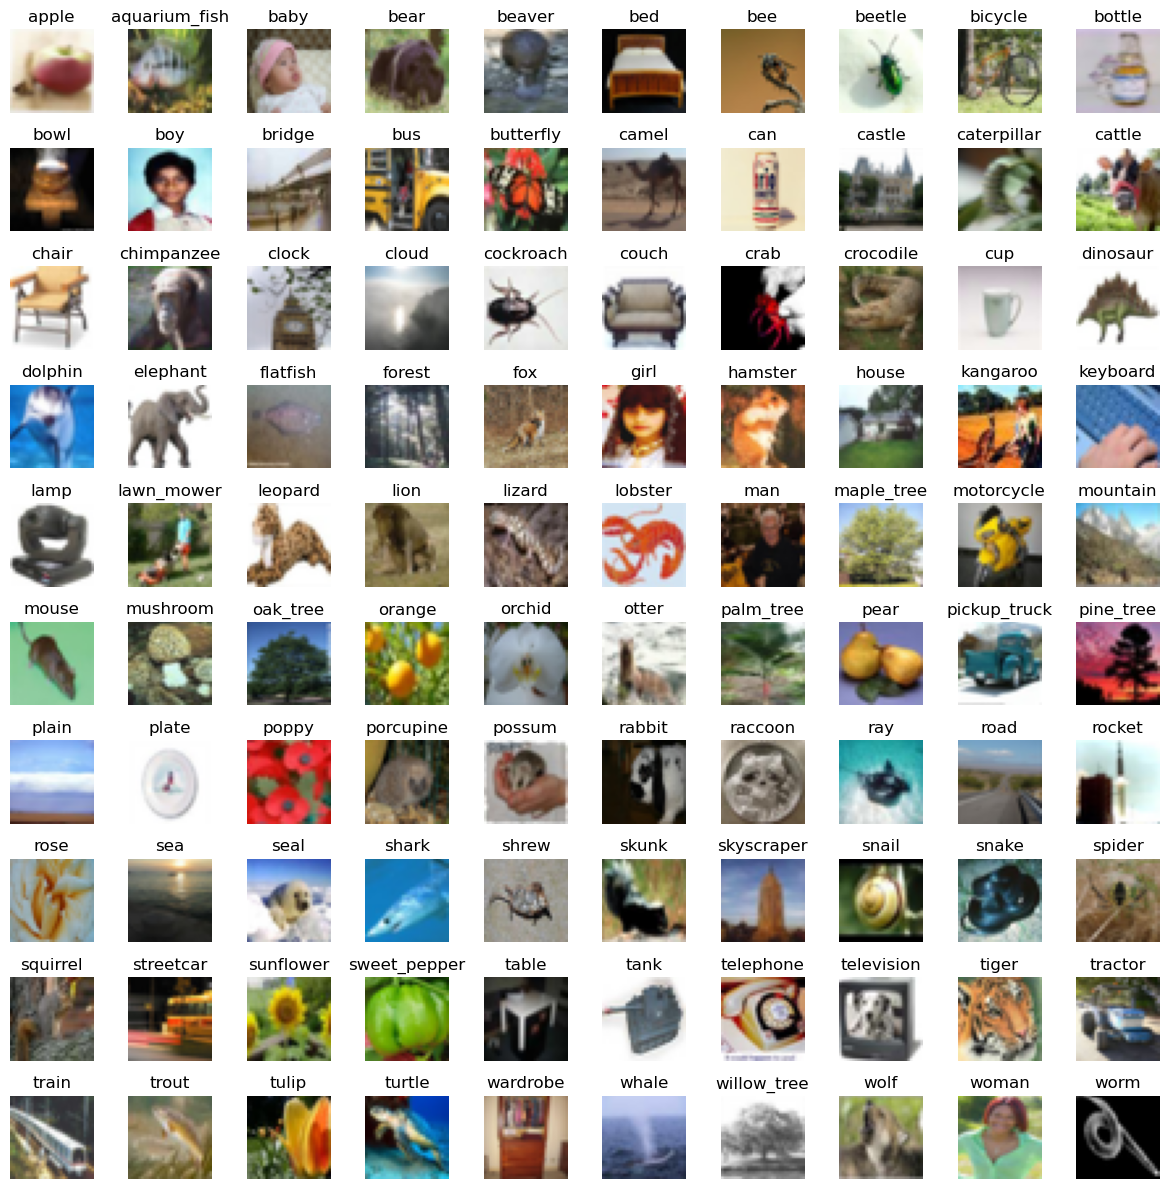

In [15]:
fig, axes = plt.subplots(10, 10, figsize=(12, 12))
for i in range(100):
    idx = np.where(train_labels == i)[0][0]  # get an index of an image for each class
    img = train_images[idx]
    ax = axes[i // 10, i % 10]
    ax.imshow(img)
    ax.set_title(label_names[i])
    ax.axis("off")
plt.tight_layout()
plt.show()


# Visualizing Classes

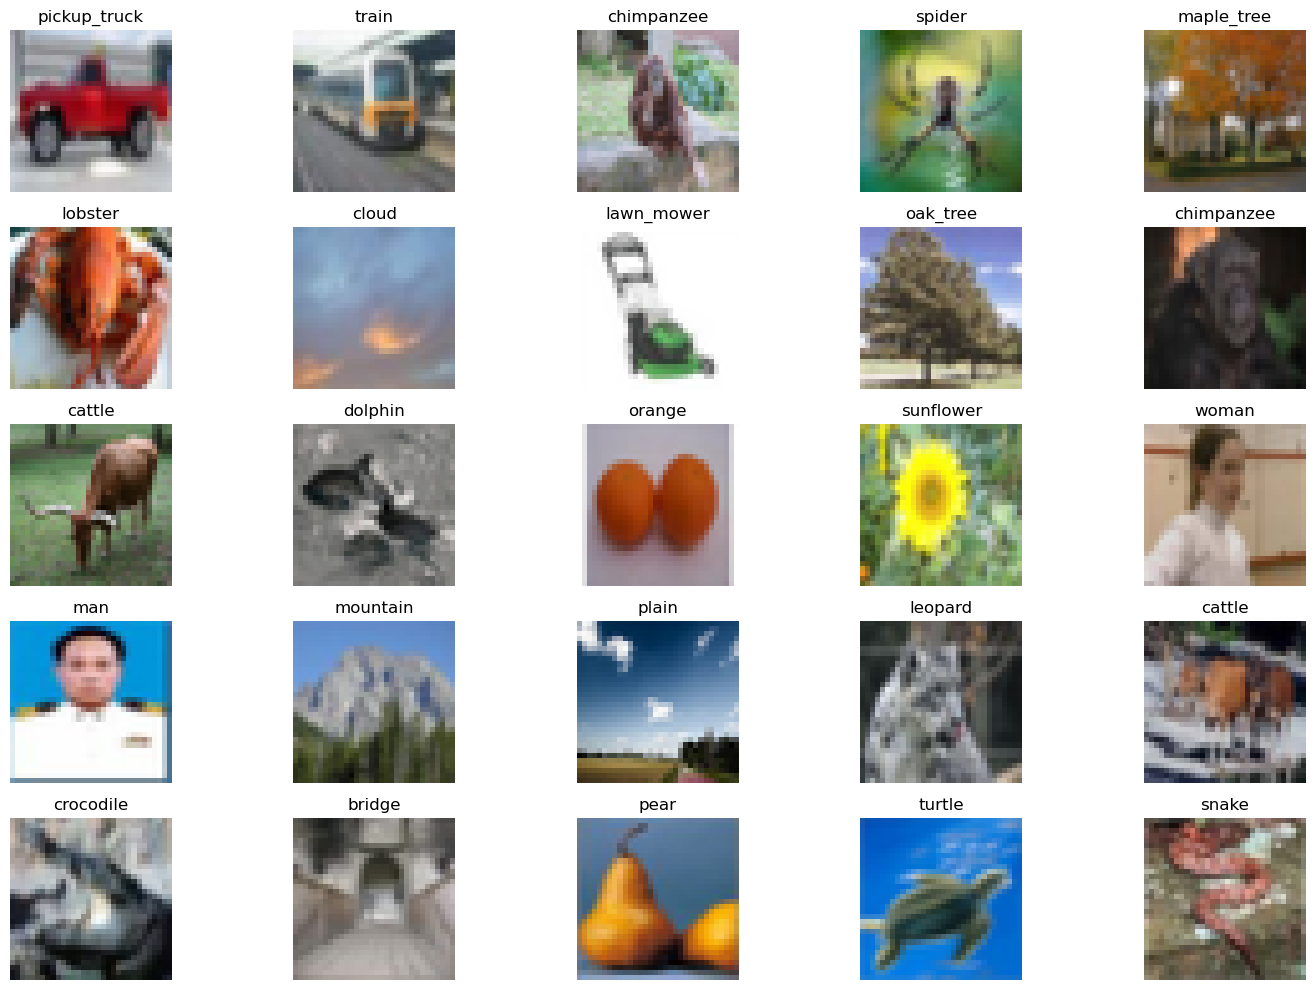

In [23]:
plt.figure(figsize=(15, 10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    random_idx = random.randint(0, len(train_images) - 1)
    plt.imshow(train_images[random_idx])
    plt.title(label_names[train_labels[random_idx]])
    plt.axis('off')

plt.tight_layout()
plt.show()


# Class Distribution

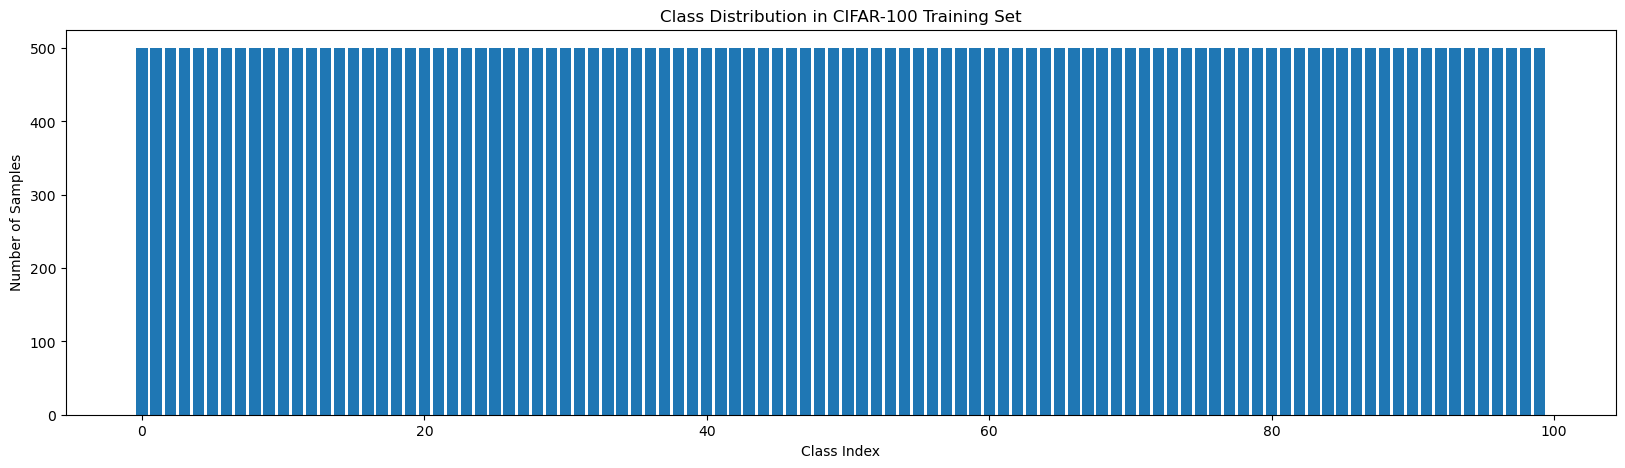

In [25]:
counter = Counter(train_labels)

plt.figure(figsize=(20,5))
plt.bar(counter.keys(), counter.values())
plt.ylabel('Number of Samples')
plt.xlabel('Class Index')
plt.title('Class Distribution in CIFAR-100 Training Set')
plt.show()

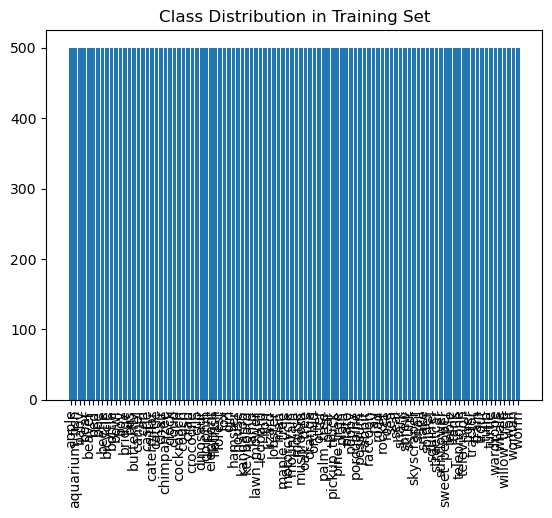

In [16]:
unique, counts = np.unique(train_labels, return_counts=True)
plt.bar(unique, counts, tick_label=label_names, align='center')
plt.title('Class Distribution in Training Set')
plt.xticks(rotation=90)
plt.show()


# Pixel Value Distribution

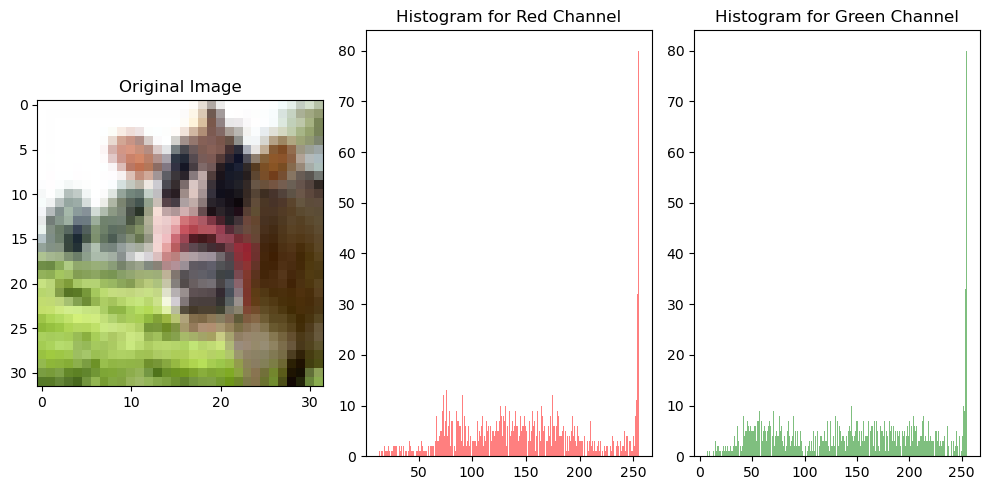

In [17]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.imshow(train_images[0])
plt.title('Original Image')
plt.subplot(1,3,2)
plt.hist(train_images[0][:,:,0].ravel(), bins=256, color='red', alpha=0.5)
plt.title('Histogram for Red Channel')
plt.subplot(1,3,3)
plt.hist(train_images[0][:,:,1].ravel(), bins=256, color='Green', alpha=0.5)
plt.title('Histogram for Green Channel')
plt.tight_layout()
plt.show()


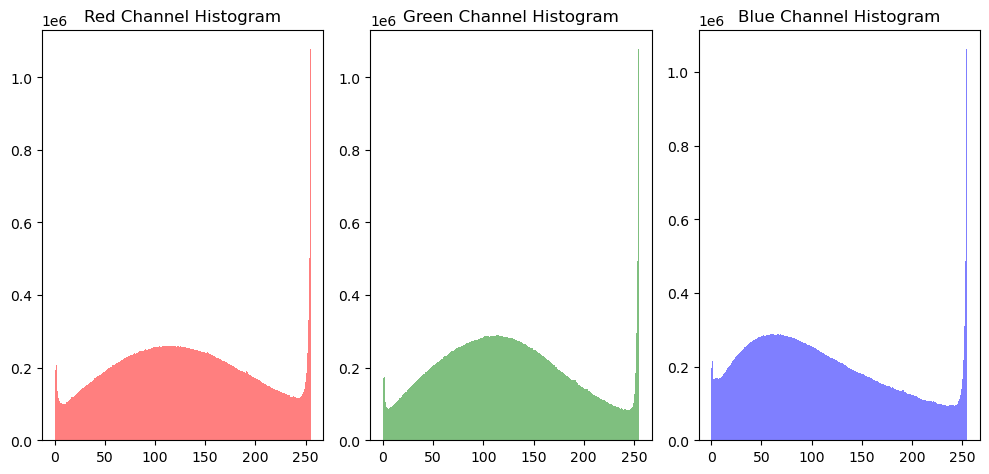

In [30]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
# plt.imshow(train_images[0])
# plt.title('Original Image')
# plt.subplot(1,3,2)
plt.hist(train_images[:,:,:,0].ravel(), bins=256, color='red', alpha=0.5)
plt.title('Red Channel Histogram')
plt.subplot(1,3,2)
plt.hist(train_images[:,:,:,1].ravel(), bins=256, color='green', alpha=0.5)
plt.title('Green Channel Histogram')
plt.subplot(1,3,3)
plt.hist(train_images[:,:,:,2].ravel(), bins=256, color='blue', alpha=0.5)
plt.title('Blue Channel Histogram')
plt.tight_layout()
plt.show()


# Mean and Standard Deviation

In [31]:
mean = np.mean(train_images, axis=(0,1,2))
std = np.std(train_images, axis=(0,1,2))
print(f"Mean: {mean}")
print(f"Standard Deviation: {std}")


Mean: [129.30416561 124.0699627  112.43405006]
Standard Deviation: [68.1702429  65.39180804 70.41837019]


In [18]:
mean = np.mean(train_images)
std_dev = np.std(train_images)
print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")


Mean: 121.936059453125
Standard Deviation: 68.38895658894971


In [19]:
mean = np.mean(test_images)
std_dev = np.std(test_images)
print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")

Mean: 122.24118916015625
Standard Deviation: 68.63056877656638


# Checking for any missing data

In [61]:
# Ensure there's no corrupt images (e.g., with shape different from 32x32x3)
corrupt_images = [img for img in train_images if img.shape != (32, 32, 3)]
print(f"Number of corrupt images: {len(corrupt_images)}")


Number of corrupt images: 0


In [20]:
print("Missing training images:", np.isnan(train_images).sum())
print("Missing training labels:", np.isnan(train_labels).sum())
print("Missing testing images:", np.isnan(test_images).sum())
print("Missing testing labels:", np.isnan(test_labels).sum())


Missing training images: 0
Missing training labels: 0
Missing testing images: 0
Missing testing labels: 0


In [32]:
# Check if any value is NaN in the training data
print(f"Missing values in training data: {np.isnan(train_images).any()}")
# Check if any value is NaN in the testing data
print(f"Missing values in testing data: {np.isnan(test_images).any()}")


Missing values in training data: False
Missing values in testing data: False


# Class label Names

In [79]:
print("Classes in CIFAR-100:")
print(label_names)


Classes in CIFAR-100:
['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', '

# Class wise visualization

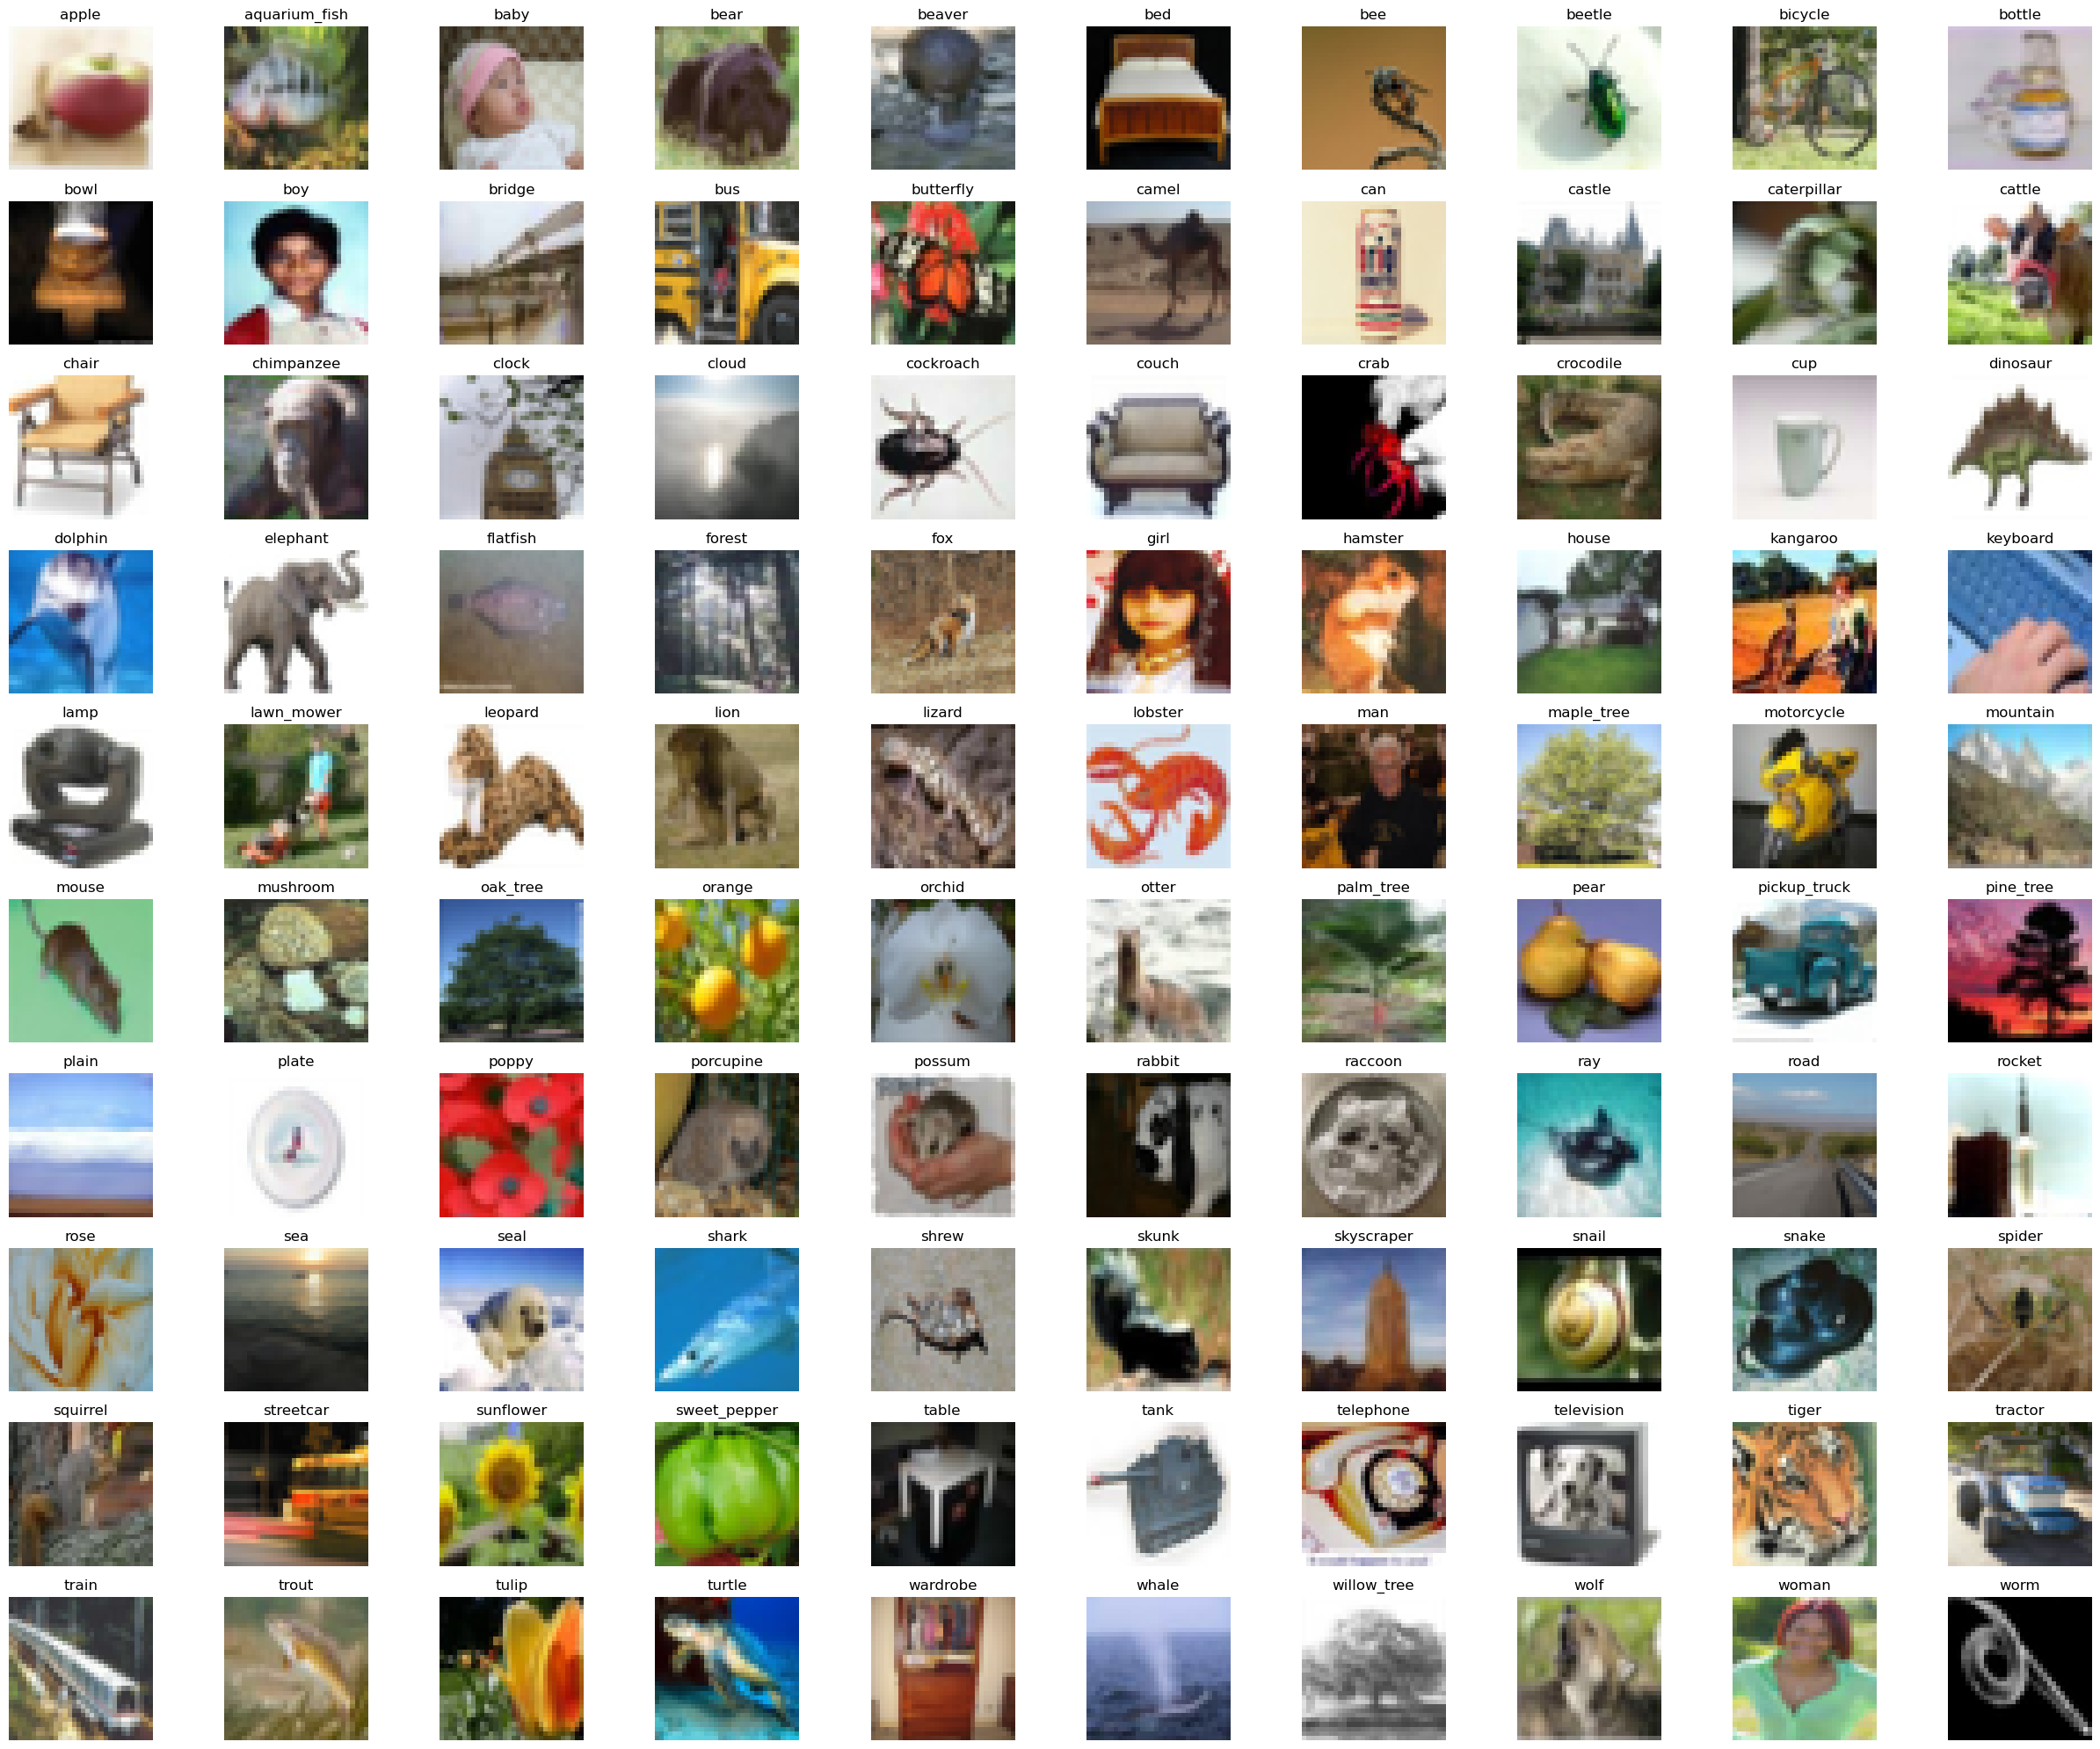

In [34]:
plt.figure(figsize=(25,20))
unique_labels = np.unique(train_labels)

for i, label in enumerate(unique_labels):
    plt.subplot(10, 10, i+1)
    # Find the first image of this label and display it
    image_idx = np.where(train_labels == label)[0][0]
    plt.imshow(train_images[image_idx])
    plt.title(label_names[label])
    plt.axis('off')

plt.tight_layout()
plt.show()


# Image Variability amongst classes 

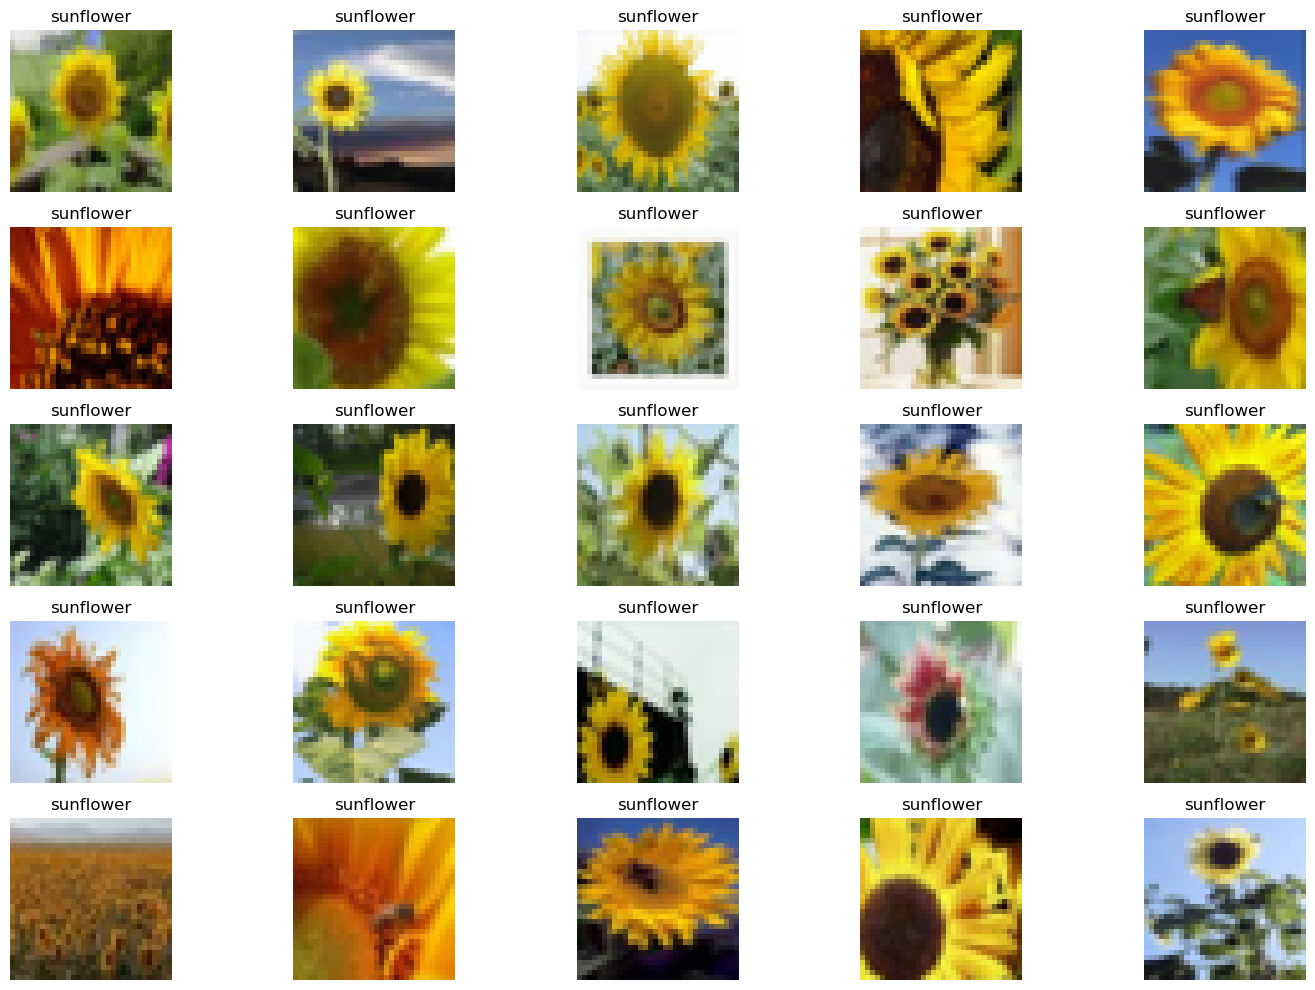

In [47]:
# Randomly selecting a class
random_class = random.choice(unique_labels)
class_indices = np.where(train_labels == random_class)[0]

plt.figure(figsize=(15,10))

for i, idx in enumerate(class_indices[:25]):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[idx])
    plt.title(label_names[random_class])
    plt.axis('off')

plt.tight_layout()
plt.show()


# Color Distribution

In [50]:
print(avg_color.shape)


(32, 3)


In [51]:
avg_color = np.squeeze(avg_color)


In [53]:
avg_color = np.mean(train_images, axis=(0, 1, 2))


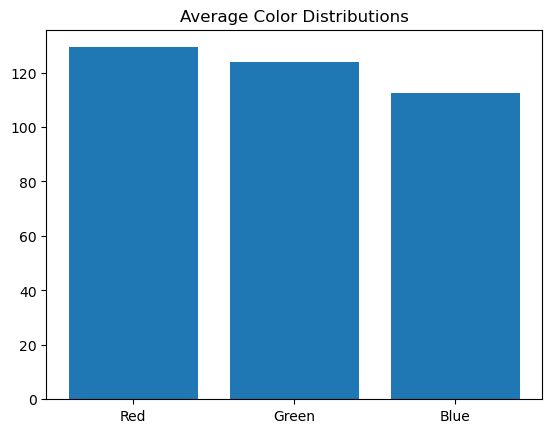

In [54]:
colors = ['Red', 'Green', 'Blue']

plt.bar(colors, avg_color)
plt.title("Average Color Distributions")
plt.show()



In [56]:
#It displays the average intensity values for the Red, Green, and Blue (RGB) channels, 
#presumably from a set of images.

#X-axis (Categories): The colors 'Red', 'Green', and 'Blue' are represented. These are the primary 
#colors for the RGB color model, which is commonly used in digital imaging.
#Y-axis (Values): Represents the intensity values of the colors. These values typically range 
#from 0 to 255 for an 8-bit image, with 0 indicating no presence of the color (darkest) and 255 
#indicating full presence of the color (brightest).

#Bars:

#Red: The height of the 'Red' bar indicates the average intensity of the red channel across the set of images.
#In this graph, the red intensity is the lowest among the three.

#Green: The 'Green' bar is noticeably taller than the 'Red' bar but slightly shorter than the 'Blue' bar. 
#This shows that the green intensity is higher than red but slightly less than blue on average across the images.

#Blue: The 'Blue' bar has the highest value among the three, suggesting that the images, on average,
#have the highest intensity in the blue channel.

# Univariate Analysis 

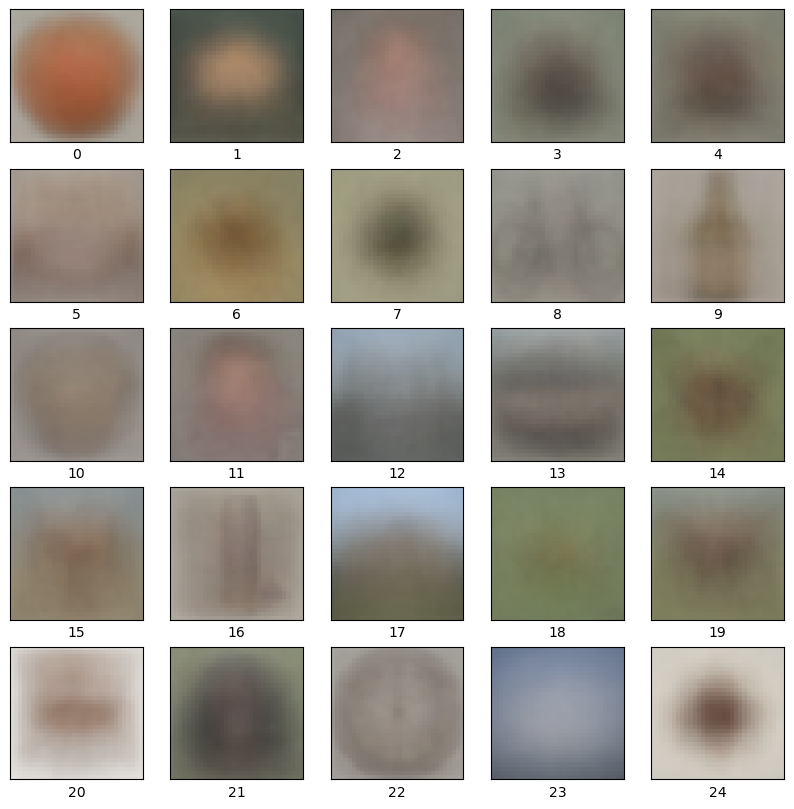

In [62]:
# Display mean image for each class
mean_images = {}
for label in np.unique(train_labels):
    mean_images[label] = np.mean(train_images[train_labels.flatten() == label], axis=0)

plt.figure(figsize=(10,10))
for i, label in enumerate(mean_images.keys()):
    if i >= 25:  # Displaying only 25 mean images for simplicity
        break
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(mean_images[label].astype(int))
    plt.xlabel(label)
plt.show()


# Assuming using mean image to detect potential anomalies


In [75]:
# # Get the mean image for the class of the first training image
# mean_img = mean_images[train_labels[0]]

# # Broadcast subtraction to get the differences
# differences = train_images - mean_img[None, :, :, :]

# # Calculate the norm over the specified axes
# distances = np.linalg.norm(differences, axis=(1,2,3))

# # Get indices of images that are considered outliers based on the distance metric
# outliers = np.where(distances > np.percentile(distances, 95))[0]

# plt.figure(figsize=(10,10))
# for i, idx in enumerate(outliers[:25]):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.imshow(train_images[idx])
#     plt.xlabel(str(train_labels[idx]))
# plt.show()



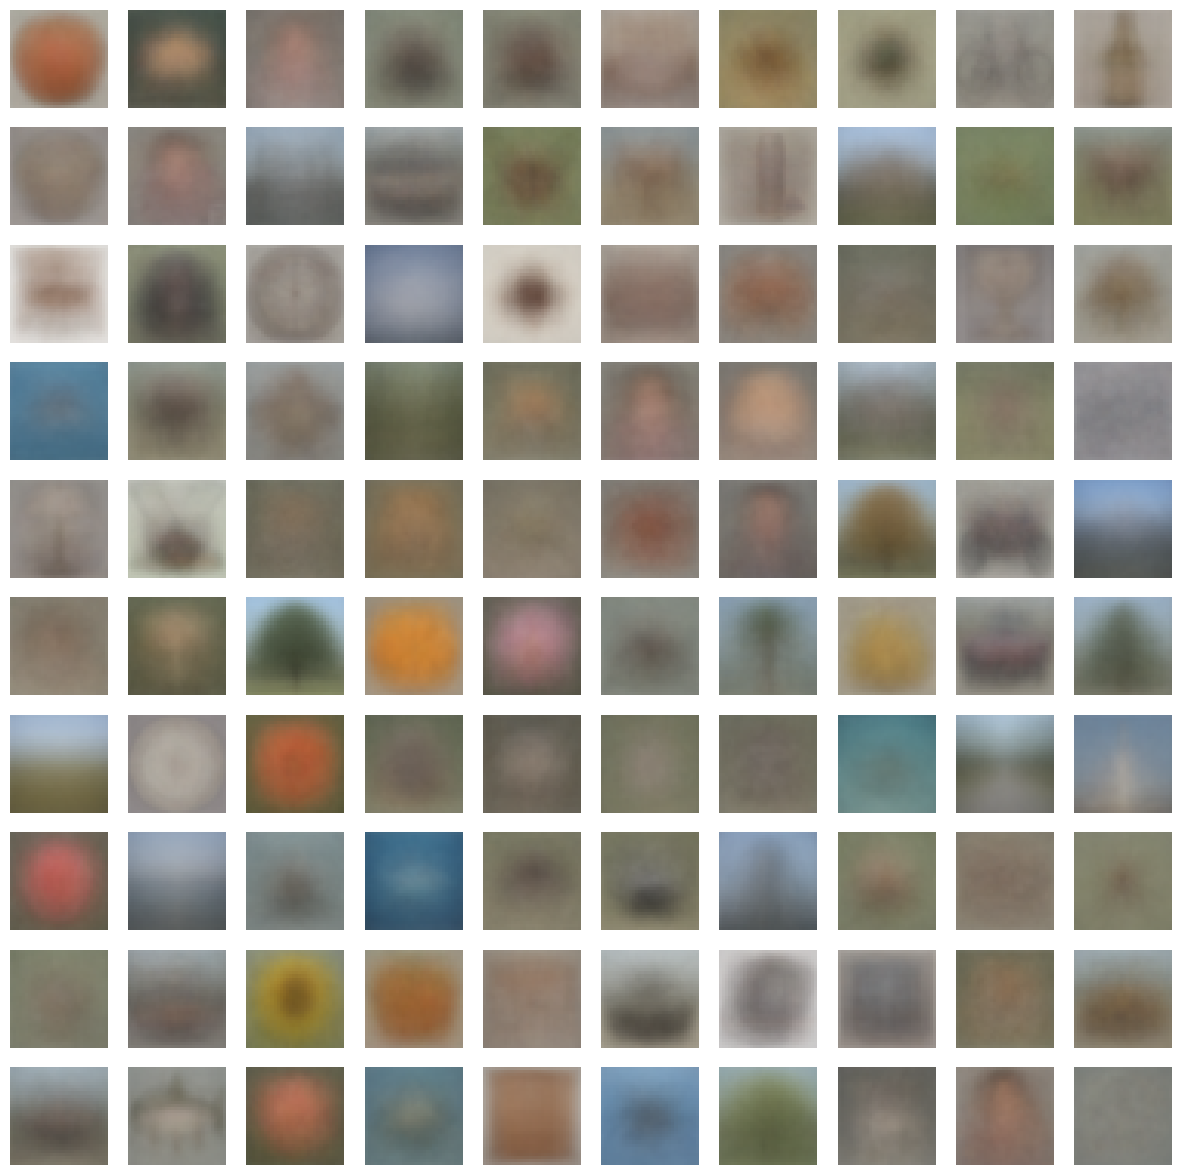

In [68]:
mean_images = np.array([train_images[train_labels.flatten() == i].mean(axis=0) for i in range(100)])

fig, axes = plt.subplots(10, 10, figsize=(15, 15))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(mean_images[i].astype('uint8'))
    ax.axis('off')
plt.show()


# Feature Engineering

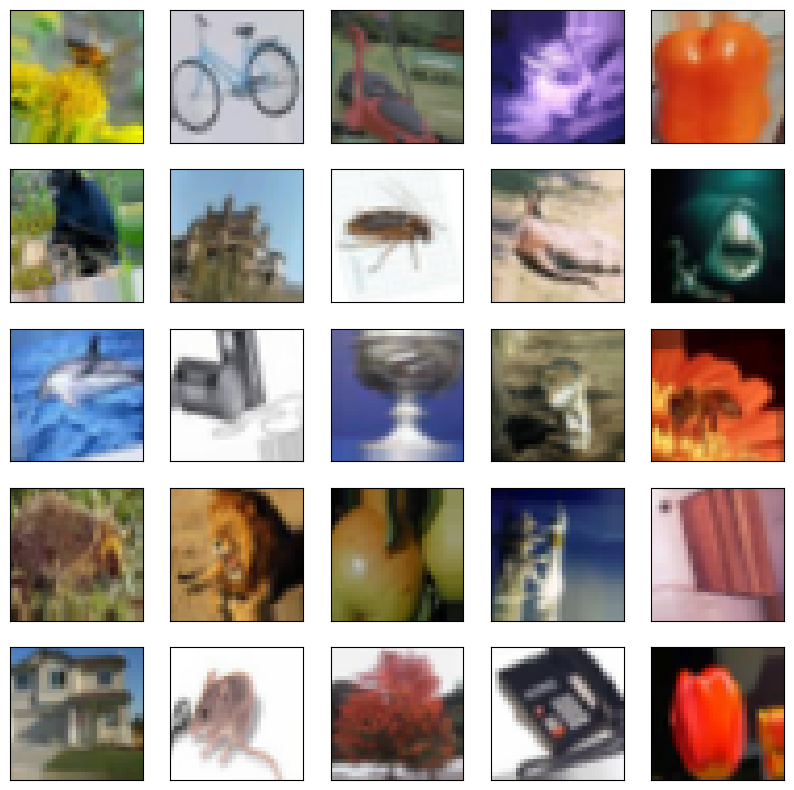

In [64]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(train_images)

# Display some augmented images
augmented_images, _ = next(datagen.flow(train_images, train_labels, batch_size=25))

plt.figure(figsize=(10,10))
for i, img in enumerate(augmented_images):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.astype(int))
plt.show()


# Data Transformation

In [65]:
# Normalize pixel values
train_images_normalized = train_images.astype('float32') / 255.0
test_images_normalized = test_images.astype('float32') / 255.0
